***
# ***Predicting Solubility - COMS5024A***
***

### **Table of Contents**
- [Introduction](#1)
  * [Context](#5)
- [Imports](#7)
  * [Python Libraries](#8)
  * [Dataset](#9)
- [Exploretory Data Analysis](#10)
  * [Data Overview](#11)
  * [Visualizations](#12)
    * [Univariate Analysis](#13)
    * [Bivariate Analysis](#14)
    * [Multivariate Analysis](#15)
- [Data Pre-processing](#19)
  * [Normalizing Data](#20)
- [Modelling](#25)
  * [Model 1](#35)
  * [Model 2](#35)
  * [Model Evaluation](#26)
  * [Hyperparameter Tuning](#26)
      * [Evaluation of Tuned Models](#26)
- [Discussion](#26)
    * [Model Comparison](#30)
      * [Before Hyperparamter Tuning](#31)
      * [After Hyperparamter Tuning](#32)
      * [(Potential) Challenges and Limitations](#33)
    * [Chemical Interpretation](#34)


***
# ***Introduction***
***

## ***Context***

In this notebook, I will use two regression techniques which are the infamous Linear Regression and Extreme Gradient Boost (XGB) Regressor to predict the solubility of chemical compounds. I will make use of the Delaney dataset for this regression task.

***
# ***Imports***
***

## ***Library Imports***

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## ***Dataset***

In [51]:
df = pd.read_csv("/content/solubility.csv")

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

In [52]:
df.info()   # basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


In [53]:
df.head() # first five rows of our data

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [54]:
df.tail()   # last five rows of our data

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
1123,halothane,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,1,72.151,0,0,1,0.00,-3.180,CCC(C)C
1127,Stirofos,1,365.964,0,1,5,44.76,-4.522,COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl


In [55]:
df.describe()   # basic stats of our data

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [56]:
# checking for missing values
missing_values  = df.isna().sum()
print(f'The number of missing values in each column is: \n {missing_values}.')


The number of missing values in each column is: 
 Compound ID                                  0
Minimum Degree                               0
Molecular Weight                             0
Number of H-Bond Donors                      0
Number of Rings                              0
Number of Rotatable Bonds                    0
Polar Surface Area                           0
measured log solubility in mols per litre    0
smiles                                       0
dtype: int64.


In [57]:
# checking for duplicates
print(f'The number of duplicated rows in this dataframe is: \n {df.duplicated().sum()}')

The number of duplicated rows in this dataframe is: 
 0


In [58]:
# storing the features in lists accodring to their data type.

categorical = [column for column in df.columns if df[column].dtype == object] # categorical features
discrete = [column for column in df.columns if df[column].dtype == int] # discrete features
continuous = [column for column in df.columns if df[column].dtype == float] # continuous features

print(f'categorical features : {categorical}')
print(f'discrete features : {discrete}')
print(f'continuous features : {continuous}')

categorical features : ['Compound ID', 'smiles']
discrete features : ['Minimum Degree', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds']
continuous features : ['Molecular Weight', 'Polar Surface Area', 'measured log solubility in mols per litre']


In [59]:
print(f'There are {len(categorical)} categorical features.')
print(f'There are {len(discrete)} discrete features.')
print(f'There are {len(continuous)} continuous features.')

There are 2 categorical features.
There are 4 discrete features.
There are 3 continuous features.


## ***Visualizations***

### ***Univariate Analysis***

In [60]:
# creating a function to plot the distribution of continuous features

def histogram(continuous_features_list, data):
    for column in continuous_features_list:   # looping through the continuous features list
      sns.histplot(data=data, x=df[column], kde=True) # histogram plot
      plt.title(f'Distribution of {column}')
      plt.show()
      print()

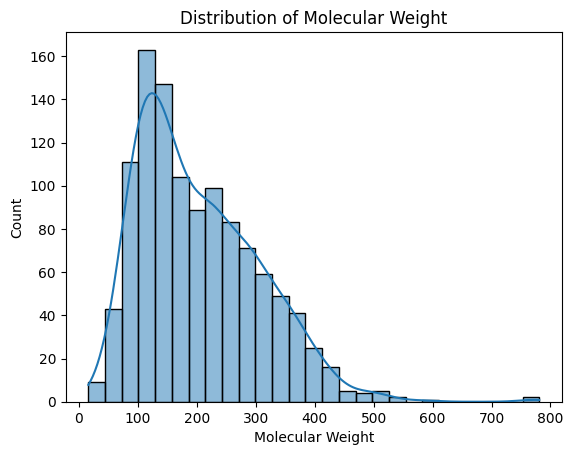

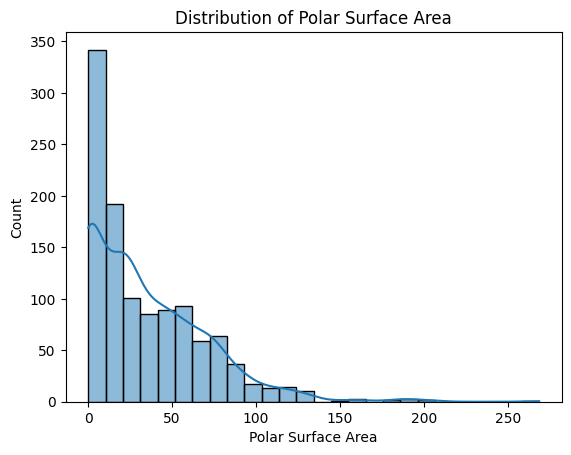

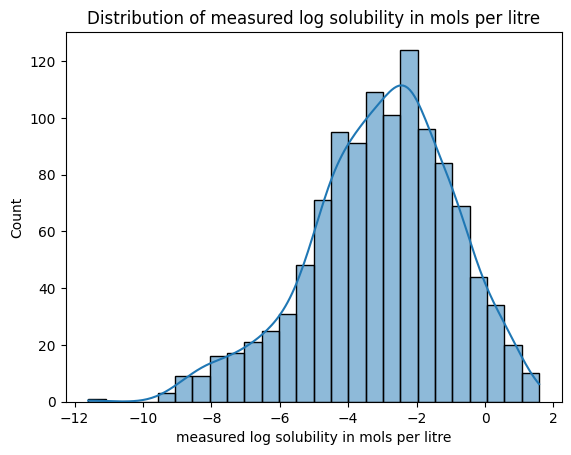

In [61]:
histogram(continuous, df)

In [62]:
# creating a function to plot the distribution of the discrete features

def bargraph(discrete_features_list, data):
    for column in discrete_features_list: # looping through the discrete features list
      sns.countplot(data=data, x=column)  # bargraph plot
      plt.title(f"Distribution of {column}")
      plt.xlabel(f"{column}")
      plt.ylabel("Counts")
      plt.show()
      print()


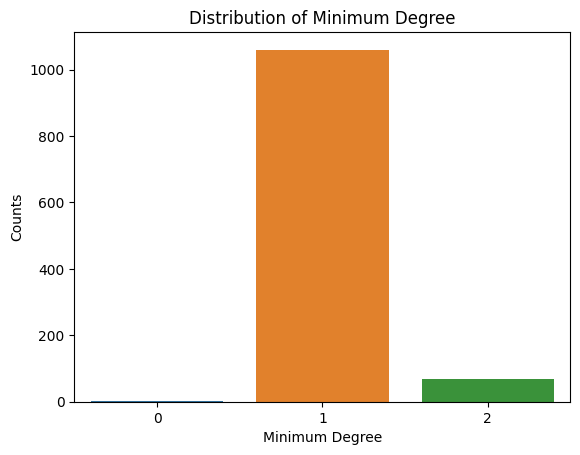

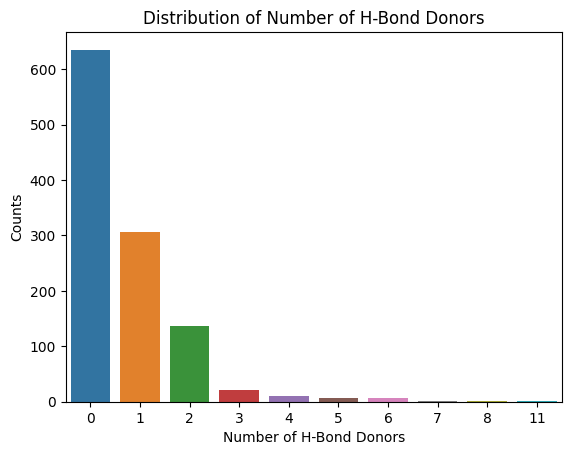

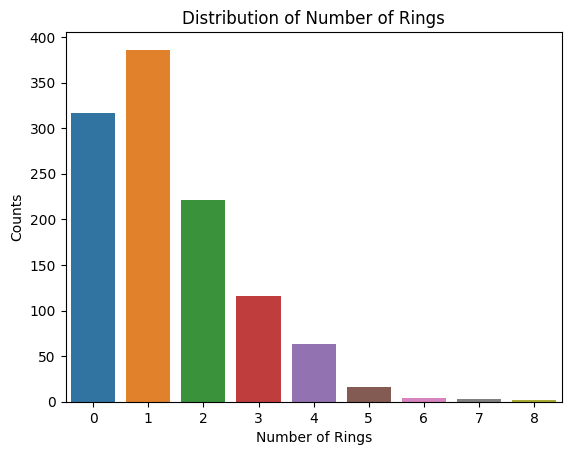

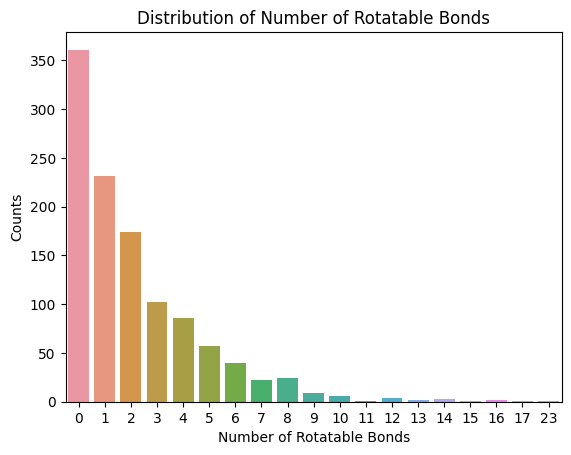

In [63]:
bargraph(discrete, df)

In [64]:
# intepretating the categorical features

for column in categorical:
  print(f'There are {df[column].nunique()} unique categories in {column}')

There are 1128 unique categories in Compound ID
There are 1128 unique categories in smiles


### ***Bivariate Analysis***

In [65]:
# creating a function for feature to feature plots for continous features

def scatter(continuous_features_list, data, hue_feature):
    for column in continuous_features_list: # looping through the continuous features list
      custom_palette = ['red', 'blue', 'green'] # color code for the hue
      if column != 'Molecular Weight':    # I chose to compare the molecular weight to the rest of the continuous features
        sns.scatterplot(x=data['Molecular Weight'], y=data[column], hue=data[hue_feature], palette=custom_palette) # scatterplot
        plt.title(f'Molecular Weight VS {column}')
        plt.xlabel(f'Molecular Weight')
        plt.ylabel(f'{column}')
        plt.show()
        print()


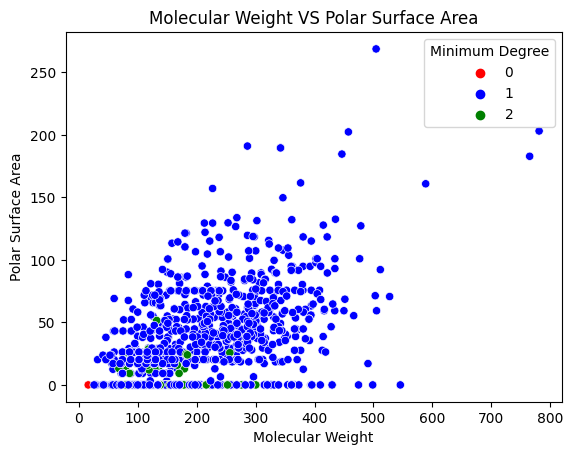

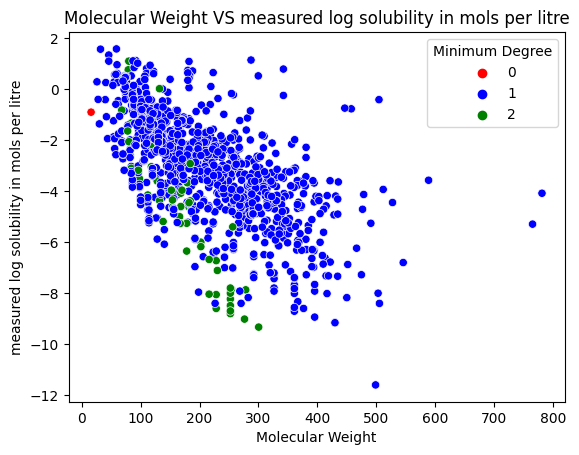

In [66]:
scatter(continuous, df, 'Minimum Degree')

### ***Multivariate Analysis***

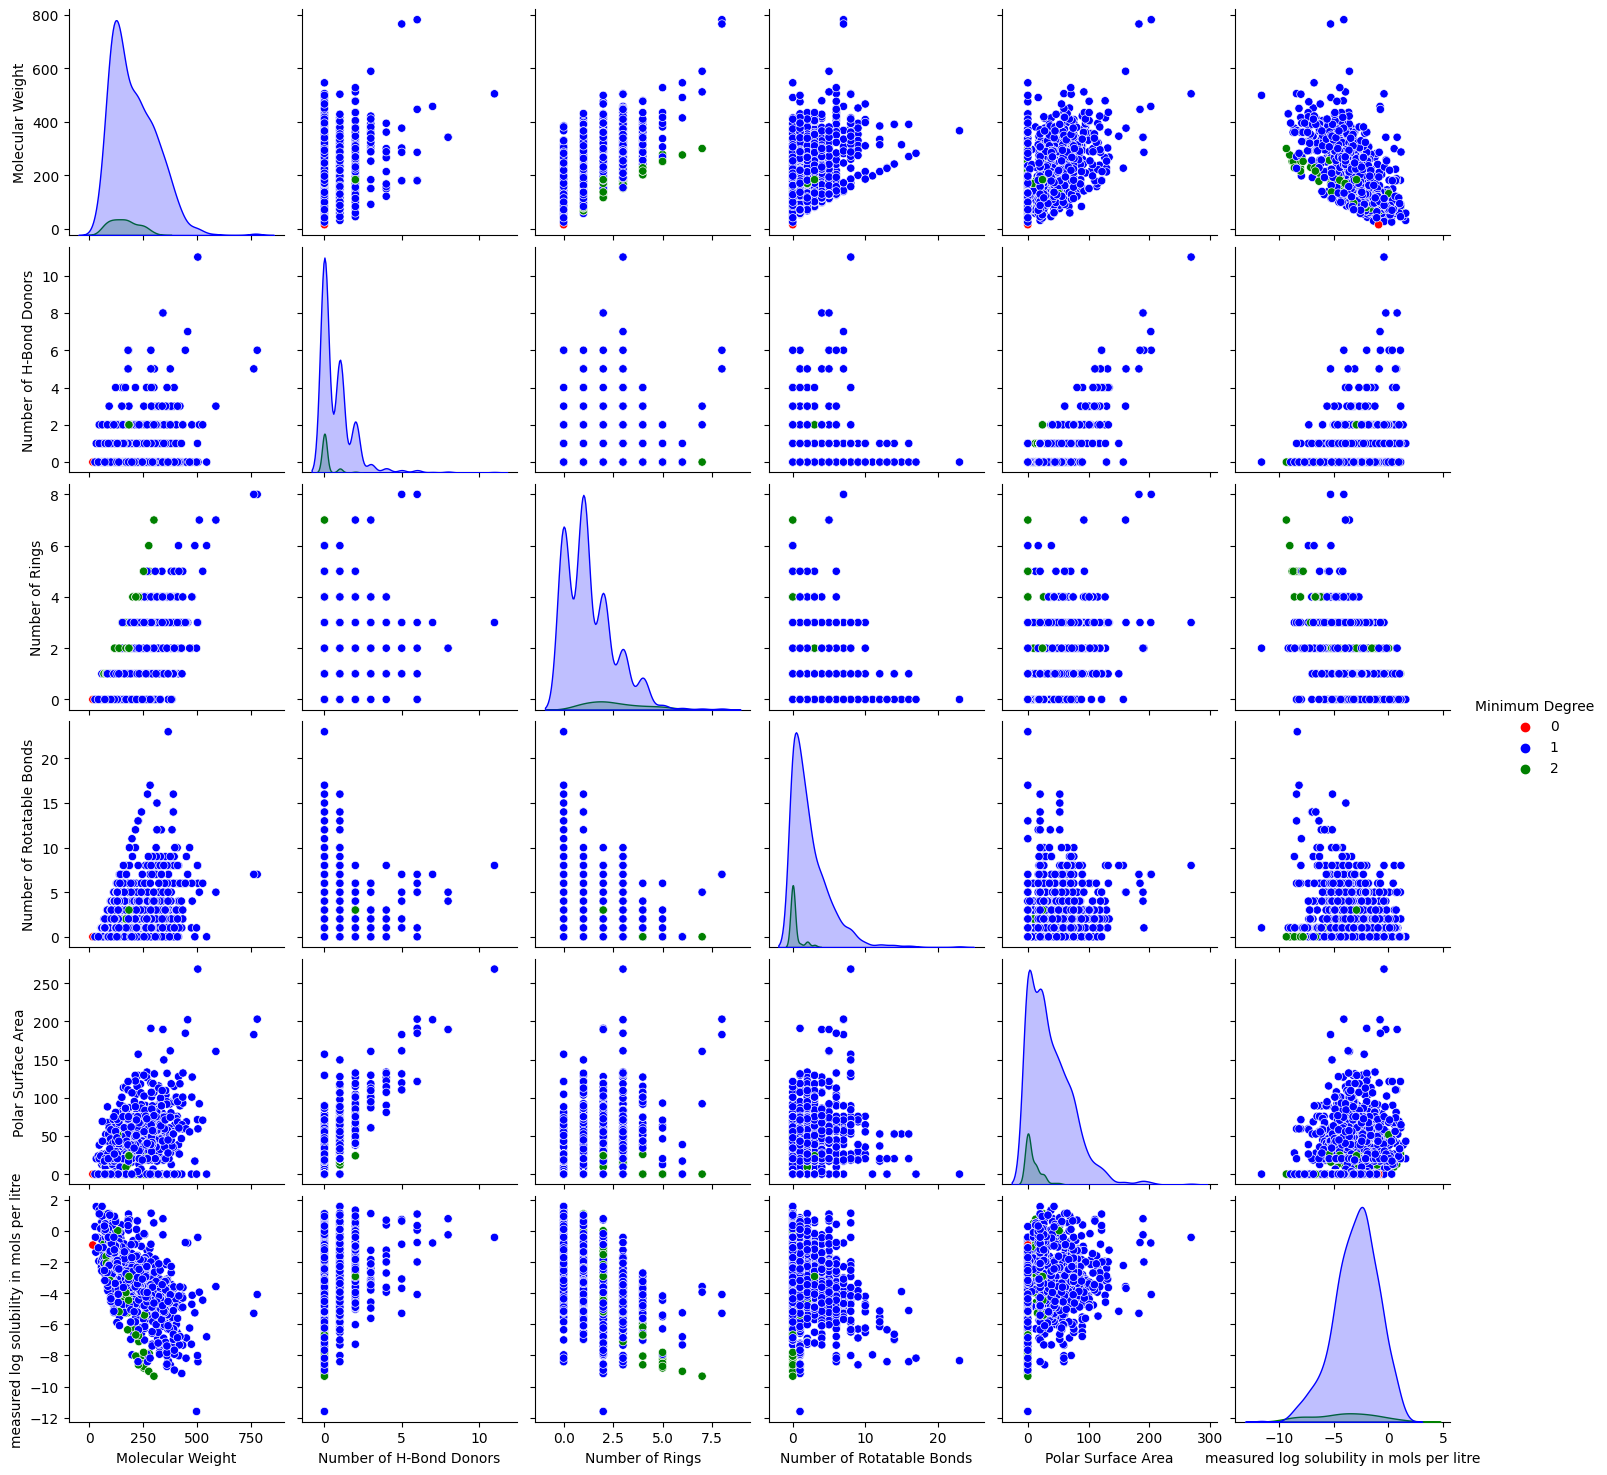

In [67]:
custom_palette = ['red', 'blue', 'green'] # color code for the hue
sns.pairplot(data=df, hue='Minimum Degree', palette = custom_palette)   # plotting a feature to multi-features plot
plt.show()

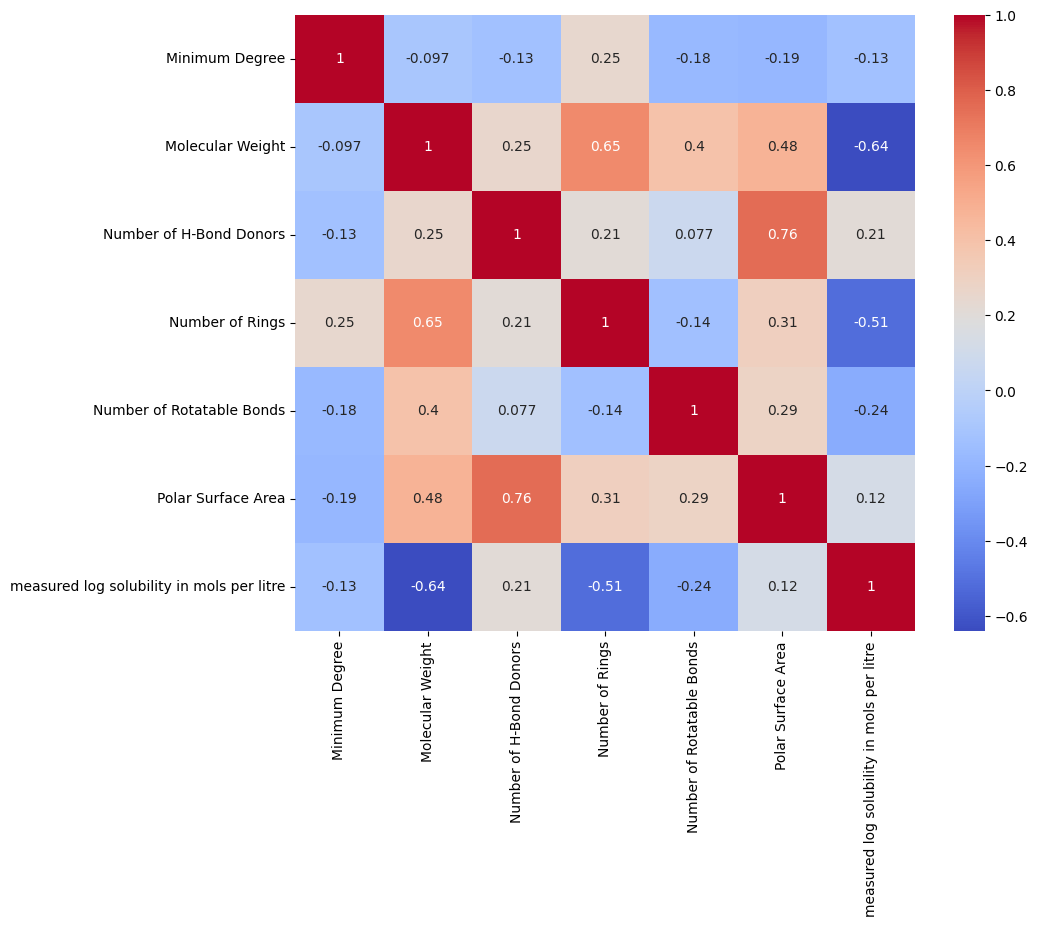

In [68]:
plt.figure(figsize=(10, 8))     # size of the figure
sns.heatmap(data=df.iloc[:, 1:-1].corr(), annot=True, cbar=True, cmap='coolwarm')   # heatmap to plot the correlation features to each other
plt.show()

***
# ***Data Preprocessing***
***

Looking at the categorical features, Compound ID and smiles, these cannot be included in the machine learning prediction as they are basically unique identifiers and will not assist in the prediction of solubility.

## ***Normalizing Data***

In [69]:
X = df.iloc[:, 1:-2]  #  input data
y = df.iloc[:, -2]   # target/classes

In [70]:
scaler = MinMaxScaler()  # an instance for normalization
X_scaled = scaler.fit_transform(X)  # normalizing the data between 0 and 1

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # splitting the data into train and test data

***
# ***Modelling***
***

The reasons why I have chosen the Linear Regression and XGBRegressor for this task:

**Linear Regression:**
   - **Interpretability:** Linear Regression is a simple and interpretable model. It provides coefficients for each input feature, allowing you to understand the linear relationship between each feature and the target variable (solubility in this case).
   - **Speed:** Linear Regression is computationally efficient and works well for datasets with a moderate number of features and samples.

**XGBoost (XGBRegressor):**
   - **Complex Patterns:** XGBoost is an ensemble method that can capture complex non-linear relationships between features and the target variable. It can model high-dimensional feature spaces and interactions effectively.
   - **Robustness:** XGBoost is less sensitive to outliers and can handle missing data more gracefully than Linear Regression. It can also work with a wide range of feature types, including categorical features.


### ***Model 1***

In [72]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)  # training the model
linear_pred = linear_reg.predict(X_test) # making predictions of test data

In [73]:
coefficients = linear_reg.coef_   # weights (coeffiecients) of features
coefficients_with_names = dict(zip(X.columns, coefficients))   # storing the coefficients and corresponding feature names in a dictionary

for key, value in coefficients_with_names.items():  # looping though th dictionary
  print(f'{key} = {value:.4f}')

Minimum Degree = -0.5502
Molecular Weight = -10.2811
Number of H-Bond Donors = 1.1909
Number of Rings = -3.2540
Number of Rotatable Bonds = -3.4809
Polar Surface Area = 8.3339


### ***Model 2***

In [74]:
# XGBoost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train) # training the model
xgb_pred = xgb_reg.predict(X_test) # predictions using the model

In [75]:
feature_importance = xgb_reg.feature_importances_   # extracting the feature importance of the features

feature_importance_dict = dict(zip(X.columns, feature_importance))    # storing them feature importance and the corresponding features in a dictionary
for key, value in feature_importance_dict.items():
  print(f'{key} = {value*100 :.2f} %')

Minimum Degree = 4.78 %
Molecular Weight = 29.46 %
Number of H-Bond Donors = 11.85 %
Number of Rings = 19.14 %
Number of Rotatable Bonds = 8.07 %
Polar Surface Area = 26.70 %


## ***Model Evaluation***

In [76]:
# creating a function to evaluate the models

def model_evaluation(model, predicted_values, y_test):

   # detecting which model is being evaluated
  if isinstance(model, LinearRegression):
    print('The Linear Regression Model performance: \n')

  if isinstance(model, XGBRegressor):
    print('The XGBRegresssor Model performance: \n')

  # evaluation metrics
  r_squared = r2_score(y_test, predicted_values)
  mse = mean_squared_error(y_test, predicted_values)
  mae = mean_absolute_error(y_test, predicted_values)
  rmse = np.sqrt(mse)

  print(f"R-squared: {r_squared:.4f}")
  print(f'Mean Squared Error: {mse:.4f}')
  print(f'Mean Absolute Error: {mae:.4f}')
  print(f'Root Mean Sqaured Error: {rmse:.4f} \n')


  # scatter of actual value vs predicted values
  plt.scatter(y_test, predicted_values)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='k')
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted")
  plt.show()
  print()

  # residual plot betwen the actual values and predicted values
  residuals = y_test - predicted_values
  plt.scatter(predicted_values, residuals)
  plt.axhline(y=0, linestyle='--', color='k')
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Residual Plot")
  plt.show()




The Linear Regression Model performance: 

R-squared: 0.6961
Mean Squared Error: 1.4366
Mean Absolute Error: 0.8917
Root Mean Sqaured Error: 1.1986 



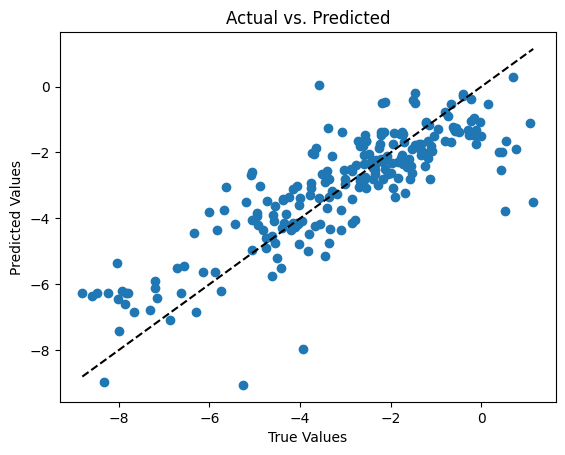

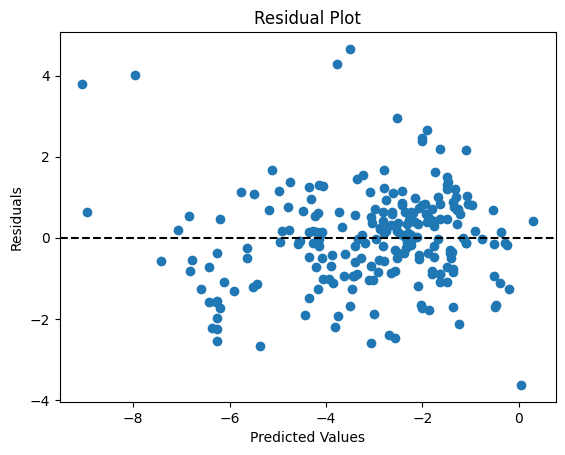

In [77]:
model_evaluation(linear_reg, linear_pred, y_test)

The XGBRegresssor Model performance: 

R-squared: 0.8250
Mean Squared Error: 0.8272
Mean Absolute Error: 0.6036
Root Mean Sqaured Error: 0.9095 



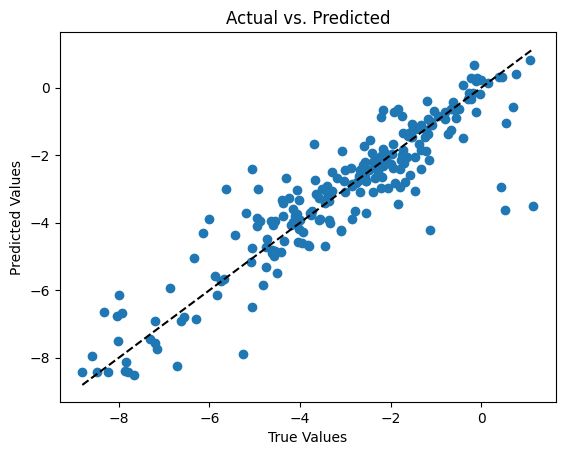

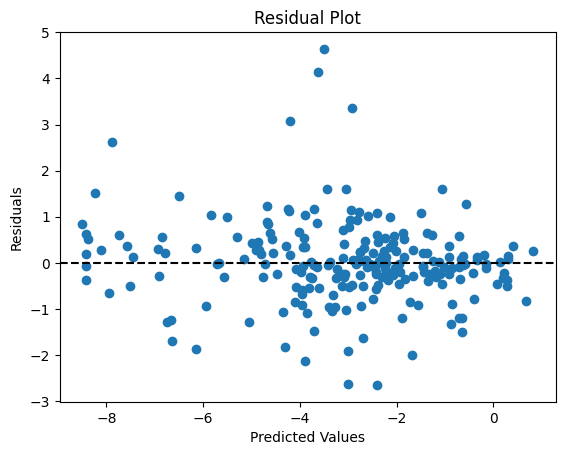

In [78]:
model_evaluation(xgb_reg, xgb_pred, y_test)

## ***Hyperparameter Tuning***

In [79]:
# creating a function for tuning the hyperparameters of the models

def hyperparameter_tuning(model, X_train, y_train, X_test):

  # tuning the linear regression model
  if isinstance(model, LinearRegression):

    linear_tuned = Ridge(alpha = 0.1) # using the Ridge model which is a Linear Regression moedl with L2 regularization to prevent overfiiting.
    linear_tuned.fit(X_train, y_train)  # training the tuned model
    linear_tuned_pred = linear_tuned.predict(X_test) # predictions of the tuned model

    return linear_tuned, linear_tuned_pred

  # tuning the xgb regressor model
  if isinstance(model, XGBRegressor):

    # a parameter grid for the tuning the hyperparameters for the xgbregressor
    param_grid = {
    'learning_rate': np.arange(0, 0.1, 0.01),
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': np.arange(3, 10),
    'min_child_weight': [1, 2, 3]
    }

    grid_search = GridSearchCV(model, param_grid, cv=3) # tuning the model
    grid_search.fit(X_train, y_train) # training the tuned model
    xgb_tuned = grid_search.best_estimator_ # the best model from grid search
    best_params = grid_search.best_params_ # extracting the best parameters for the tuned model
    xgb_tuned_pred = xgb_tuned.predict(X_test)  # predictions of the tuned model


    return xgb_tuned, xgb_tuned_pred, best_params


### ***Evaluation of Tuned Models***

***Tuned Linear Regression***

In [80]:
linear_tuned, linear_tuned_pred = hyperparameter_tuning(linear_reg, X_train, y_train, X_test)

In [81]:
coefficients = linear_tuned.coef_   # weights (coeffiecients) of features
coefficients_with_names = dict(zip(X.columns, coefficients))   # storing the coefficients and corresponding feature names in a dictionary

for key, value in coefficients_with_names.items():  # looping though th dictionary
  print(f'{key} = {value:.4f}')

Minimum Degree = -0.5340
Molecular Weight = -10.1200
Number of H-Bond Donors = 1.3225
Number of Rings = -3.2996
Number of Rotatable Bonds = -3.4796
Polar Surface Area = 8.1494


R-squared: 0.6955
Mean Squared Error: 1.4391
Mean Absolute Error: 0.8928
Root Mean Sqaured Error: 1.1996 



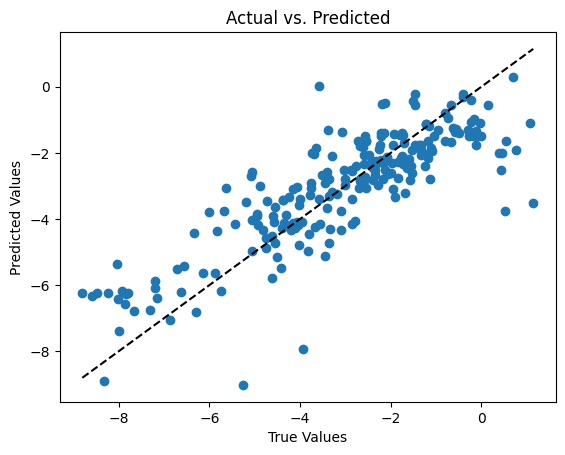

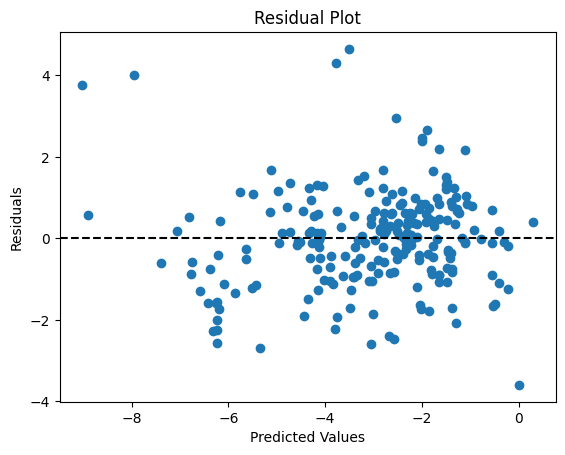

In [82]:
model_evaluation(linear_tuned, linear_tuned_pred, y_test)

***Tuned XGB Regressor***

In [83]:
xgb_tuned, xgb_tuned_pred, best_params = hyperparameter_tuning(xgb_reg, X_train, y_train, X_test)

In [84]:
print('The best parameters for XGBRegressor according to the hyperparameter tuning: \n')
for key, value in best_params.items():
  print(f'{key} = {value}')

The best parameters for XGBRegressor according to the hyperparameter tuning: 

learning_rate = 0.08
max_depth = 3
min_child_weight = 3
n_estimators = 250


In [85]:
feature_importance = xgb_tuned.feature_importances_   # extracting the feature importance of the features

feature_importance_dict = dict(zip(X.columns, feature_importance))    # storing them feature importance and the corresponding features in a dictionary
for key, value in feature_importance_dict.items():
  print(f'{key} = {value*100 :.2f} %')

Minimum Degree = 3.98 %
Molecular Weight = 38.41 %
Number of H-Bond Donors = 11.33 %
Number of Rings = 15.05 %
Number of Rotatable Bonds = 10.21 %
Polar Surface Area = 21.02 %


The XGBRegresssor Model performance: 

R-squared: 0.8438
Mean Squared Error: 0.7384
Mean Absolute Error: 0.6037
Root Mean Sqaured Error: 0.8593 



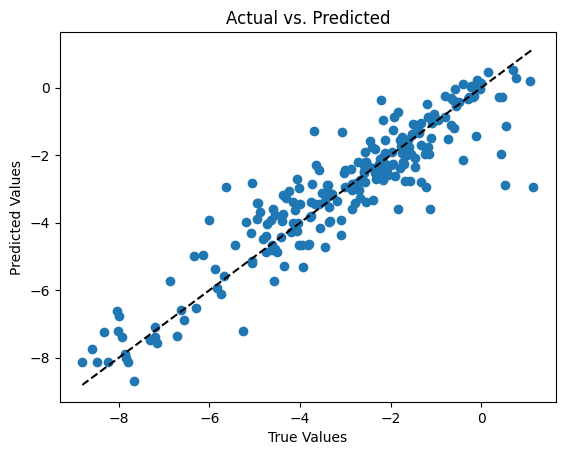

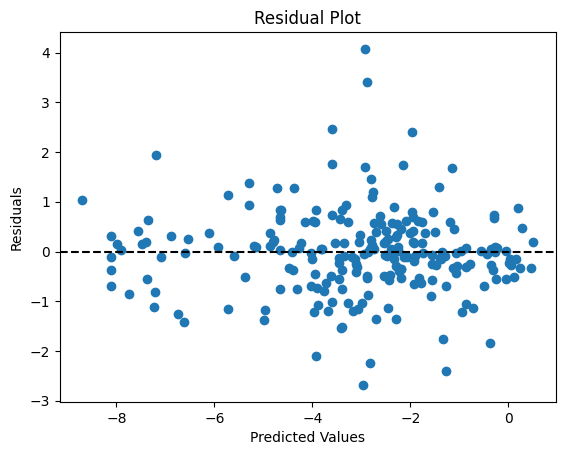

In [86]:
model_evaluation(xgb_tuned, xgb_tuned_pred, y_test)

***
# ***Discussion***
***

For predicting solubility, I used Linear Regression and XGB Regressor. The dataset I used was the Delaney dataset, which contains a collection of chemical compounds along with their experimentally determined solubility values. The objective was to create a predictive model that can estimate the solubility of a compound based on its molecular structure. I performed various steps to achieve this, including Exploratory Data Analysis, Data Preprocessing, and Modeling, with each step having substeps.

## ***Model Comparison***

### ***Before Hyperparameter Tuning***

***Linear Regression***

Starting with the Linear Regression model, I used the following evaluation metrics: R-squared (coefficient of determination), Mean Squared Error, Mean Absolute Error, and Root Mean Squared Error. These metrics presented the following values:

- R-squared: 0.6961
- Mean Squared Error (MSE): 1.4366
- Mean Absolute Error (MAE): 0.8917
- Root Mean Squared Error (RMSE): 1.1986

R-squared measures the proportion of the variance in the dependent variable explained by the independent variables in the regression model. An R-squared value of 0.6961 indicates that approximately 69.61% of the variance in the target variable is explained by the model. This means that my model fits about 69.91% of the data correctly. MSE is a measure of the average squared difference between the predicted values and the actual target values in your dataset. It measures the amount of error in statistical models. Therefore, a lower MSE indicates a better fit. An MSE of 1.4366 means that, on average, my model's predictions have a squared difference (error) of 1.4366 with the actual values. MAE is similar to MSE but measures the average absolute difference between the predicted values and the actual values. Therefore, a lower MAE is better. An MAE of 0.8917 means that, on average, my model's predictions are off by approximately 0.8917 units from the actual values, representing the average magnitude of prediction errors. RMSE is the square root of the MSE and provides a measure of the typical error in my model's predictions. It has the same unit as the target variable. Therefore, the lower RMSE is, the better. An RMSE of 1.1986 suggests that, on average, my model's predictions have an error of approximately 1.1986 units from the actual values.

In conclusion, the model explains about 69.61% of the variance in the target variable. The MSE, MAE, and RMSE values help us understand the magnitude of prediction errors, with lower values indicating better model performance.

***The predicted vs. actual values plots***

From the Actual vs. Predicted plot, we can see that the predicted and the actual values follow a linearly increasing trend. There are quite a number of outliers, but the overall trend is linear. Furthermore, this is seen from the Residual Plot, which is a plot that shows the difference between the predicted values and the actual values, called Residuals. A good predictor will show the difference between values to be populated around the dashed line (y=0), indicating errors between the actual and predicted values to be close to zero. From the above plot, we can see quite a number of points close to zero, indicating a good fit, although there are a few values that are far from zero.

***XGB Regressor***

The XGB Regressor Model's performance:

* R-squared: 0.8250
* Mean Squared Error: 0.8272
* Mean Absolute Error: 0.6036
* Root Mean Sqaured Error: 0.9095

An R-squared value of 0.8250 indicates that approximately 82.50% of the variance in the target variable is explained by the XGBRegressor model. This means that my model captures about 82.50% of the variability in the data. An MSE of 0.8272 means that, on average, the XGBRegressor model's predictions have a squared difference of 0.8272 with the actual values. An MAE of 0.6036 means that, on average, my XGBRegressor model's predictions are off by approximately 0.6036 units from the actual values. This represents the average magnitude of prediction errors. An RMSE of 0.9095 suggests that, on average, the XGBRegressor model's predictions have an error of approximately 0.9095 units from the actual values.

In conclusion, the XGBRegressor model explains about 82.50% of the variance in the target variable, and it has relatively low values for MSE, MAE, and RMSE, which suggests that it provides reasonably accurate predictions with small errors.

***The predicted vs. actual values plots***

From the Actual vs. Predicted plot, we can see that the predicted and the actual values follow a linearly increasing trend. There are fewer outliers, but the overall trend is linear. Furthermore, it has a longer horizontal bandwidth compared to the Linear Regression around the y=0 line, indicating that the XGB Regressors capture more of the variability of the data.

### ***After Hyperparameter Tuning***

To improve the models, I conducted hyperparameter tuning.

***Linear Regression***

For Linear Regression, I employed the L2 regularization technique through the Ridge Regression model. Ridge Regression is a variant of Linear Regression that uses L2 regularization to prevent overfitting and enhance the model's generalization performance. After tuning, the model yielded the following results:

- R-squared: 0.6955
- Mean Squared Error: 1.4391
- Mean Absolute Error: 0.8928
- Root Mean Squared Error: 1.1996

An R-squared value of 0.6955 indicates that approximately 69.55% of the variance in the target variable is explained by the Ridge Regression model. This means the model captures about 69.55% of the data's variability. An MSE of 1.4391 means that, on average, the Ridge Regression model's predictions have a squared difference of 1.4391 compared to the actual values. An MAE of 0.8928 means that, on average, the Ridge Regression model's predictions deviate by approximately 0.8928 units from the actual values, representing the average magnitude of prediction errors. An RMSE of 1.1996 suggests that, on average, the Ridge Regression model's predictions have an error of approximately 1.1996 units from the actual values.

In conclusion, the Ridge Regression model explains about 69.55% of the variance in the target variable, and it yields moderate values for MSE, MAE, and RMSE. These performance metrics suggest that the model provides reasonably accurate predictions with a moderate level of error.

***The predicted vs. actual values plots***

In the Actual vs. Predicted plot, we observe a linearly increasing trend between the predicted and actual values. There are quite a few outliers, but the overall trend remains linear. Similar to the untuned Linear Regression model, we notice several data points close to zero, indicating a good fit. However, there are still some values that deviate significantly from zero. Additionally, the plot has a narrow horizontal bandwidth compared to the untuned XGB Regressor, suggesting that it doesn't capture the data's variability as well as the XGB Regressor.

***XGB Regressor***

For the XGB Regressor, I employed the Grid Search CV hyperparameter tuning technique, which exhaustively explores combinations of provided parameters to extract the best set of parameters for the model. The best parameters from hyperparameter tuning were as follows:

- Learning rate = 0.08
- Max depth = 3
- Min child weight = 3
- Number of estimators = 250

The corresponding performance metrics of the model were:

- R-squared: 0.8438
- Mean Squared Error: 0.7384
- Mean Absolute Error: 0.6037
- Root Mean Squared Error: 0.8593

An R-squared value of 0.8438 indicates that approximately 84.38% of the variance in the target variable is explained by the XGBRegressor model. This implies that the model captures about 84.38% of the data's variability. An MSE of 0.7384 means that, on average, the XGBRegressor model's predictions have a squared difference of 0.7384 compared to the actual values. An MAE of 0.6037 means that, on average, the XGBRegressor model's predictions deviate by approximately 0.6037 units from the actual values, representing the average magnitude of prediction errors. An RMSE of 0.8593 suggests that, on average, the XGBRegressor model's predictions have an error of approximately 0.8593 units from the actual values.

In conclusion, the XGBRegressor model explains about 84.38% of the variance in the target variable, and it yields relatively low values for MSE, MAE, and RMSE, indicating that it provides accurate predictions with small errors.

***The predicted vs. actual values plots***

In the Actual vs. Predicted plot, we can observe a linearly increasing trend between the predicted and actual values. There are a few outliers. Similar to the untuned XGB Regressor, we notice several data points close to zero, indicating a good fit. However, there are still some values that deviate from zero. Furthermore, the plot has a wider horizontal bandwidth compared to the other three models around the y=0 line, indicating that the tuned XGB Regressor captures more of the data's variability.

***Final Remarks about the Models***

Based on the evaluation of the models, the tuned XGBRegressor outperformed the Linear Regression, Ridge Regression, and the untuned XGBRegressor models. It exhibited the highest R-squared value and its predictions had the lowest average errors compared to the actual values (based on MSE, MAE, and RMSE).

### ***(Potential) Challenges and Limitations***

* Hyperparameter Tuning with Grid Search CV: Since the algorithm depends on the parameters you supply, it can take a considerable amount of time to find the best parameter combinations. This process is computationally expensive.

* Zeros within the dataset: For someone without a background in Chemistry, it can be challenging to determine whether the zeros in the dataset are actual zero values collected from the data or if they represent missing values where someone used zero as a substitute for a missing value.

* Unique Compound ID: Each row in the dataset has a unique compound ID. After the machine learning modeling process, the only way to identify the compound ID is based on the predicted values of the features. This also applies to the SMILES notation.


## ***Chemical Interpretation***

When interpreting the chemical properties for predicting solubility, I will use the best model, which is the Tuned XGBRegressor.

The function returned the feature importance of each chemical property, which is as follows:

* Minimum Degree = 3.98%
* Molecular Weight = 38.41%
* Number of H-Bond Donors = 11.33%
* Number of Rings = 15.05%
* Number of Rotatable Bonds = 10.21%
* Polar Surface Area = 21.02%

From this, we can observe that Molecular Weight contributes the most to predicting the solubility of a compound, followed by Polar Surface Area, Number of Rings, Number of H-Bond Donors, Number of Rotatable Bonds, and finally, Minimum Degree. Five out of the six features displayed feature importance of at least 10% and above. Minimum Degree had the least importance with 3.98%. Therefore, we can safely omit Minimum Degree as an effective feature for predicting solubility. If we proposed a method to train the model with these five features, we would likely obtain a good predictor for solubility as well.